<a href="https://colab.research.google.com/github/sharinair14/Basic-ML-Practice/blob/master/Decision_Tree_with_Tiitanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
data=pd.read_csv('/content/data_cleaned.csv')

In [21]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [22]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
data.shape

(891, 25)

In [23]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [24]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [25]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,stratify=y,test_size=0.2)
#stratify parameter will preserve the proportion of target as in original dataset, in the train and test datasets as well.

In [32]:
x_train.shape

(712, 24)

In [33]:
y_train.shape

(712,)

In [30]:
y_train.value_counts(normalize=True)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [31]:
y_test.value_counts(normalize=True)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
#training score
dt.score(x_train,y_train)

0.9831460674157303

In [38]:
#testing score
dt.score(x_test,y_test)

0.7932960893854749

In [39]:
dt.predict_proba(x_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [40]:
ypred=dt.predict_proba(x_test)[:,1]

In [49]:
ynew=[]
for i in range(len(ypred)):
  if ypred[i] <= 0.8:
    ynew.append(0)
  else:
    ynew.append(1)

In [47]:
#new accuracy
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,ynew)

0.7932960893854749

In [ ]:
#Changing max depth

In [63]:
train_accu=[]
test_accu=[]
for depth in range(1,20):
  dt_model=DecisionTreeClassifier(max_depth=depth)
  dt_model.fit(x_train,y_train)
  train_accu.append(dt_model.score(x_train,y_train))
  test_accu.append(dt_model.score(x_test,y_test))

In [64]:
df=pd.DataFrame({'Max Depth':range(1,20),'Training accuracy':train_accu,'Testing accuracy':test_accu})

In [65]:
df.head()

,Max Depth,Training accuracy,Testing accuracy
0,1,0.782303,0.804469
1,2,0.782303,0.804469
2,3,0.817416,0.837989
3,4,0.825843,0.821229
4,5,0.858146,0.798883


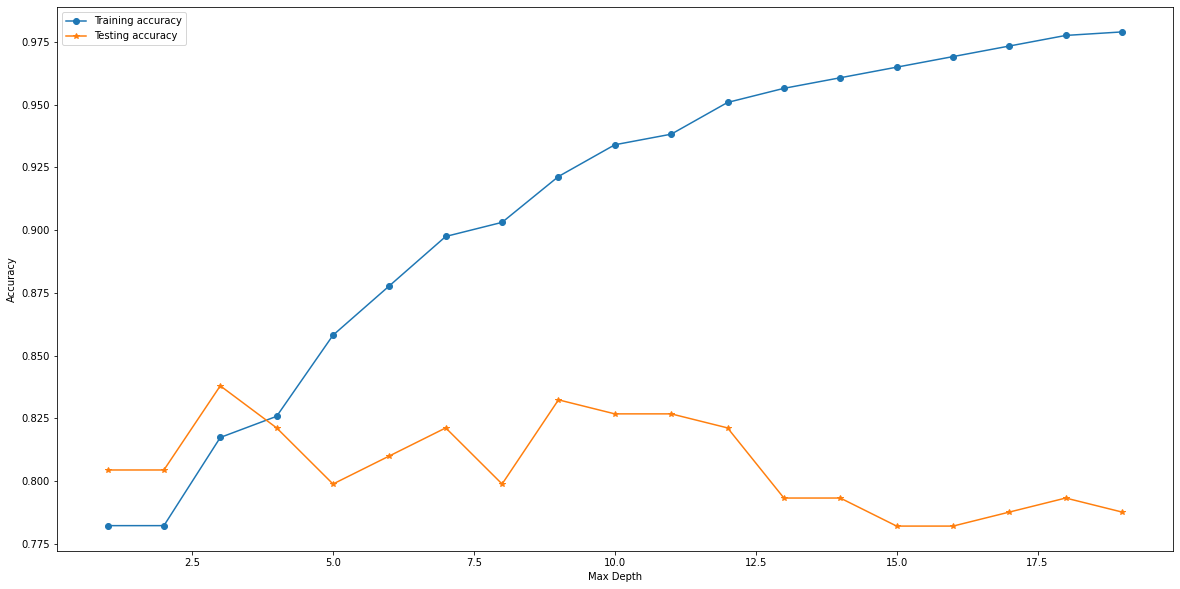

In [66]:
plt.figure(figsize=(20,10))
plt.plot(df['Max Depth'],df['Training accuracy'],marker='o')
plt.plot(df['Max Depth'],df['Testing accuracy'],marker='*')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(labels=['Training accuracy','Testing accuracy'])

In [ ]:
#so max depth= 9 should be taken because after 9 the testing data accuracy is falling

In [83]:
dt_model=DecisionTreeClassifier(max_depth=9,min_samples_split=300,min_samples_leaf=50)

In [84]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
dt_model.score(x_train,y_train)

0.7823033707865169

In [86]:
dt_model.score(x_test,y_test)

0.8044692737430168

In [87]:
from sklearn import tree

In [88]:
pip install graphviz

In [89]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=x_train.columns,max_depth=2,filled=True)

In [90]:
!dot -Tpng tree.dot -o tree.png

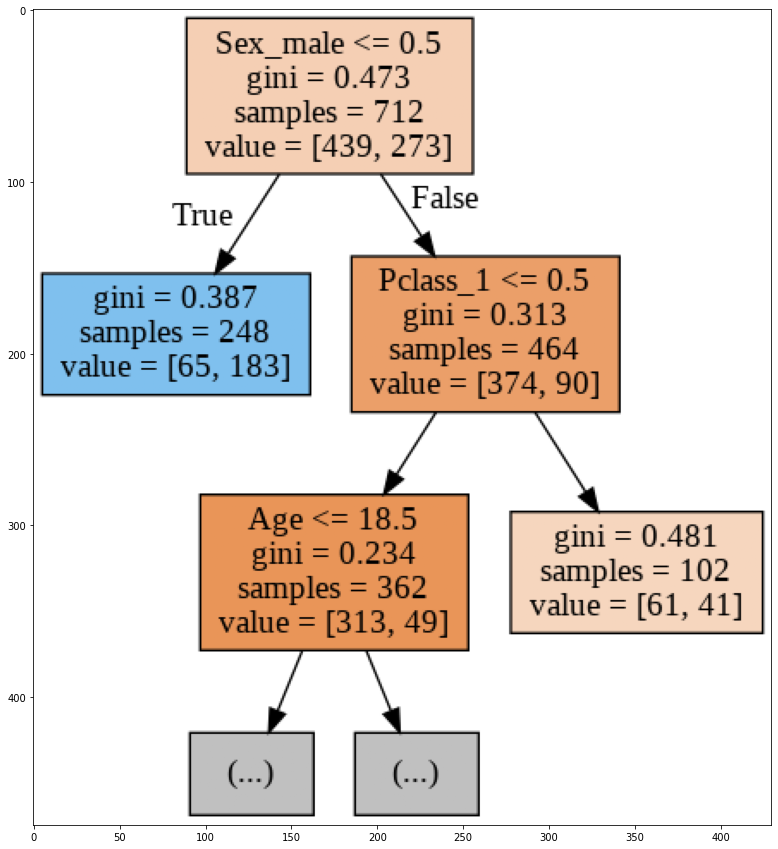

In [91]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)